In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import warnings 
warnings.simplefilter("ignore") 


In [5]:
df  = pd.read_csv("/Users/tejeshboppana/HotelReservationPredction/artifacts/raw/train.csv")

In [6]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [11]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [28]:
df.drop(columns=['Booking_ID'],axis=1,inplace=True)

KeyError: "['Booking_ID'] not found in axis"

In [14]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [16]:
df.shape

(29020, 18)

In [17]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [18]:
df.duplicated().sum()

7661

In [20]:
df.drop_duplicates(inplace=True)    

In [21]:
df.shape

(21359, 18)

In [29]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [30]:
### OUR DATA IS IMBALANCED AND NEEDS TO BE BALANCED BEFORE MODEL TRAINING

cat_cols = ['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'market_segment_type', 'booking_status', 'repeated_guest']

num_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']

In [31]:
### DATA ANALYSIS AND VISUALIZATION

data = df.copy()
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


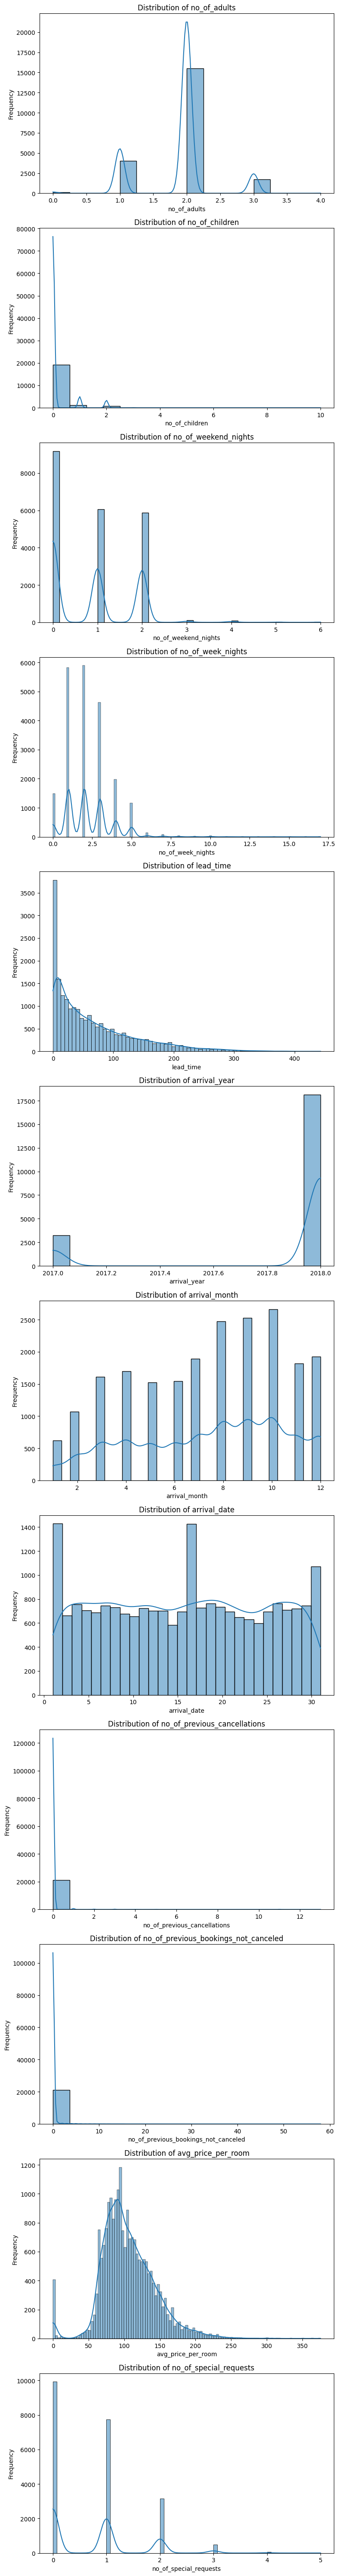

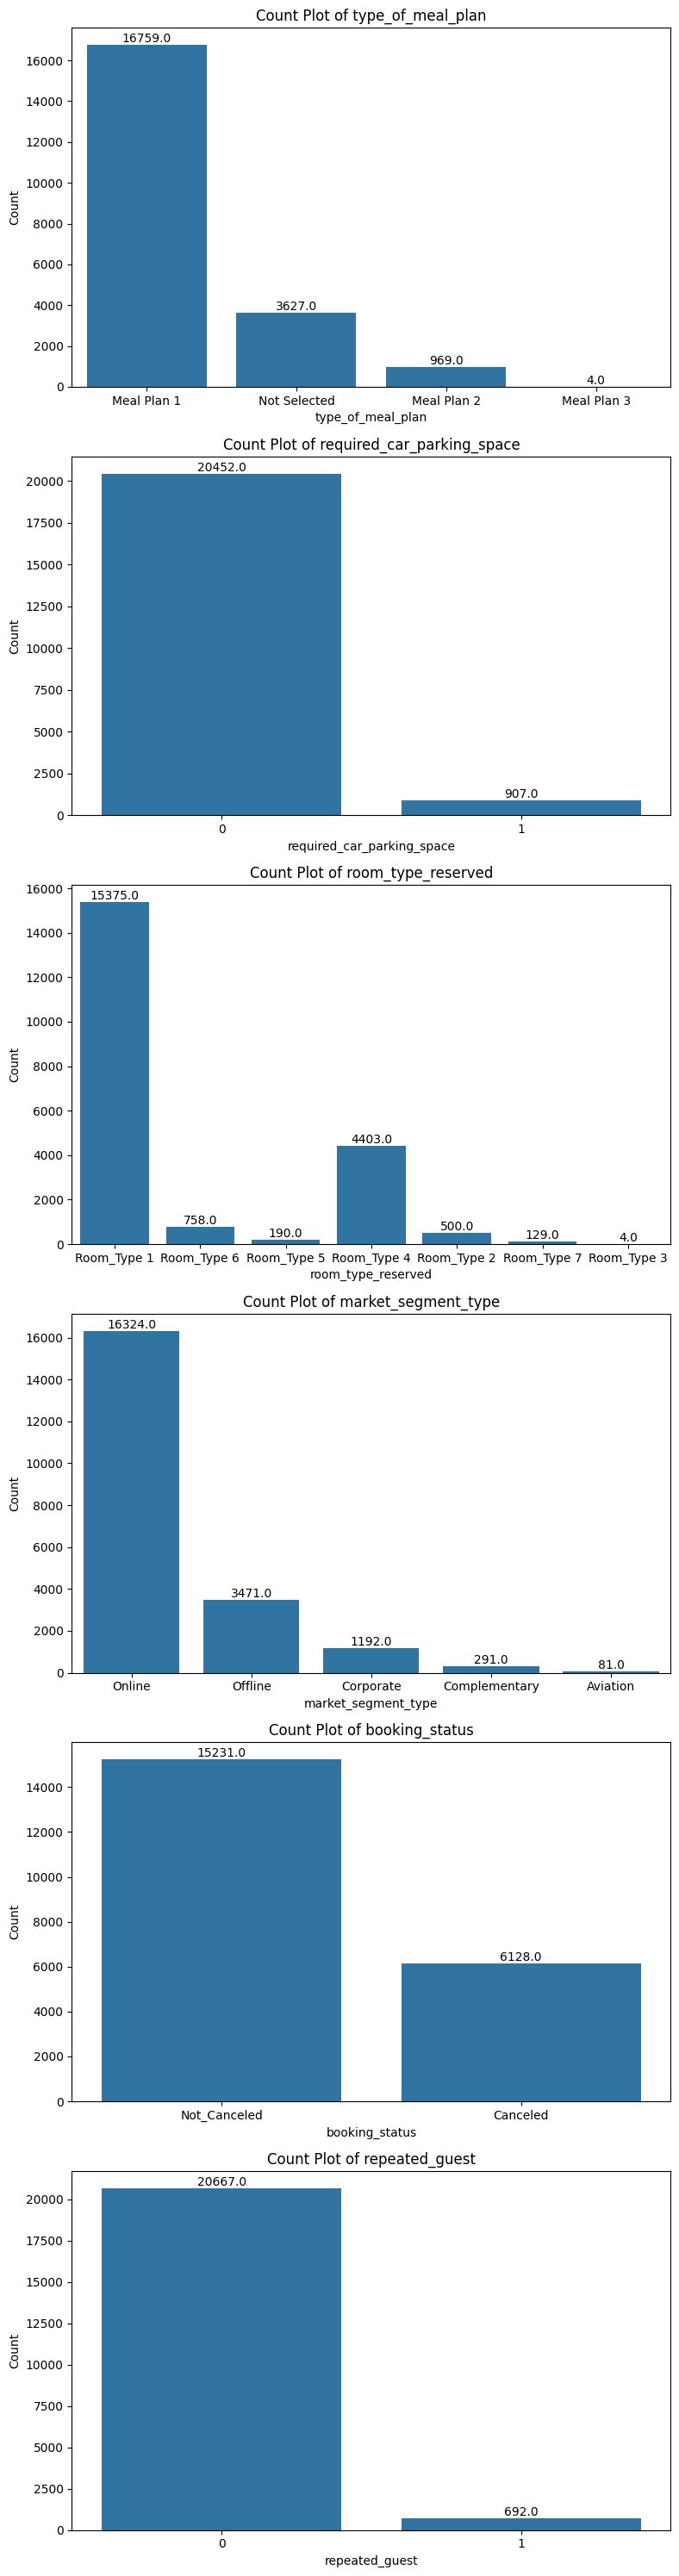

In [32]:
#UNIVARIATE ANALYSIS

def num_plot_dist(df,num_features):
    fig, axes = plt.subplots(len(num_features),1, figsize=(8,5*len(num_features)))
    if len(num_features) ==1:
        axes = [axes]
    for i, num_feature in enumerate(num_features):
        sns.histplot(df[num_feature], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {num_feature}')
        axes[i].set_xlabel(num_feature)
        axes[i].set_ylabel('Frequency')
    plt.tight_layout()
    plt.show()

num_plot_dist(data,num_cols)
def cat_plot_count(df,cat_features):
    fig, axes = plt.subplots(len(cat_features),1, figsize=(8,5*len(cat_features)))
    if len(cat_features) ==1:
        axes = [axes]
    for i, cat_feature in enumerate(cat_features):
        sns.countplot(x=df[cat_feature], ax=axes[i])
        axes[i].set_title(f'Count Plot of {cat_feature}')
        axes[i].set_xlabel(cat_feature)
        axes[i].set_ylabel('Count')
        for p in axes[i].patches:
            height = p.get_height()
            axes[i].annotate(f'{height}', (p.get_x()+p.get_width()/2., height), ha='center', va='bottom')
    plt.tight_layout()
    plt.show()

cat_plot_count(data,cat_cols)


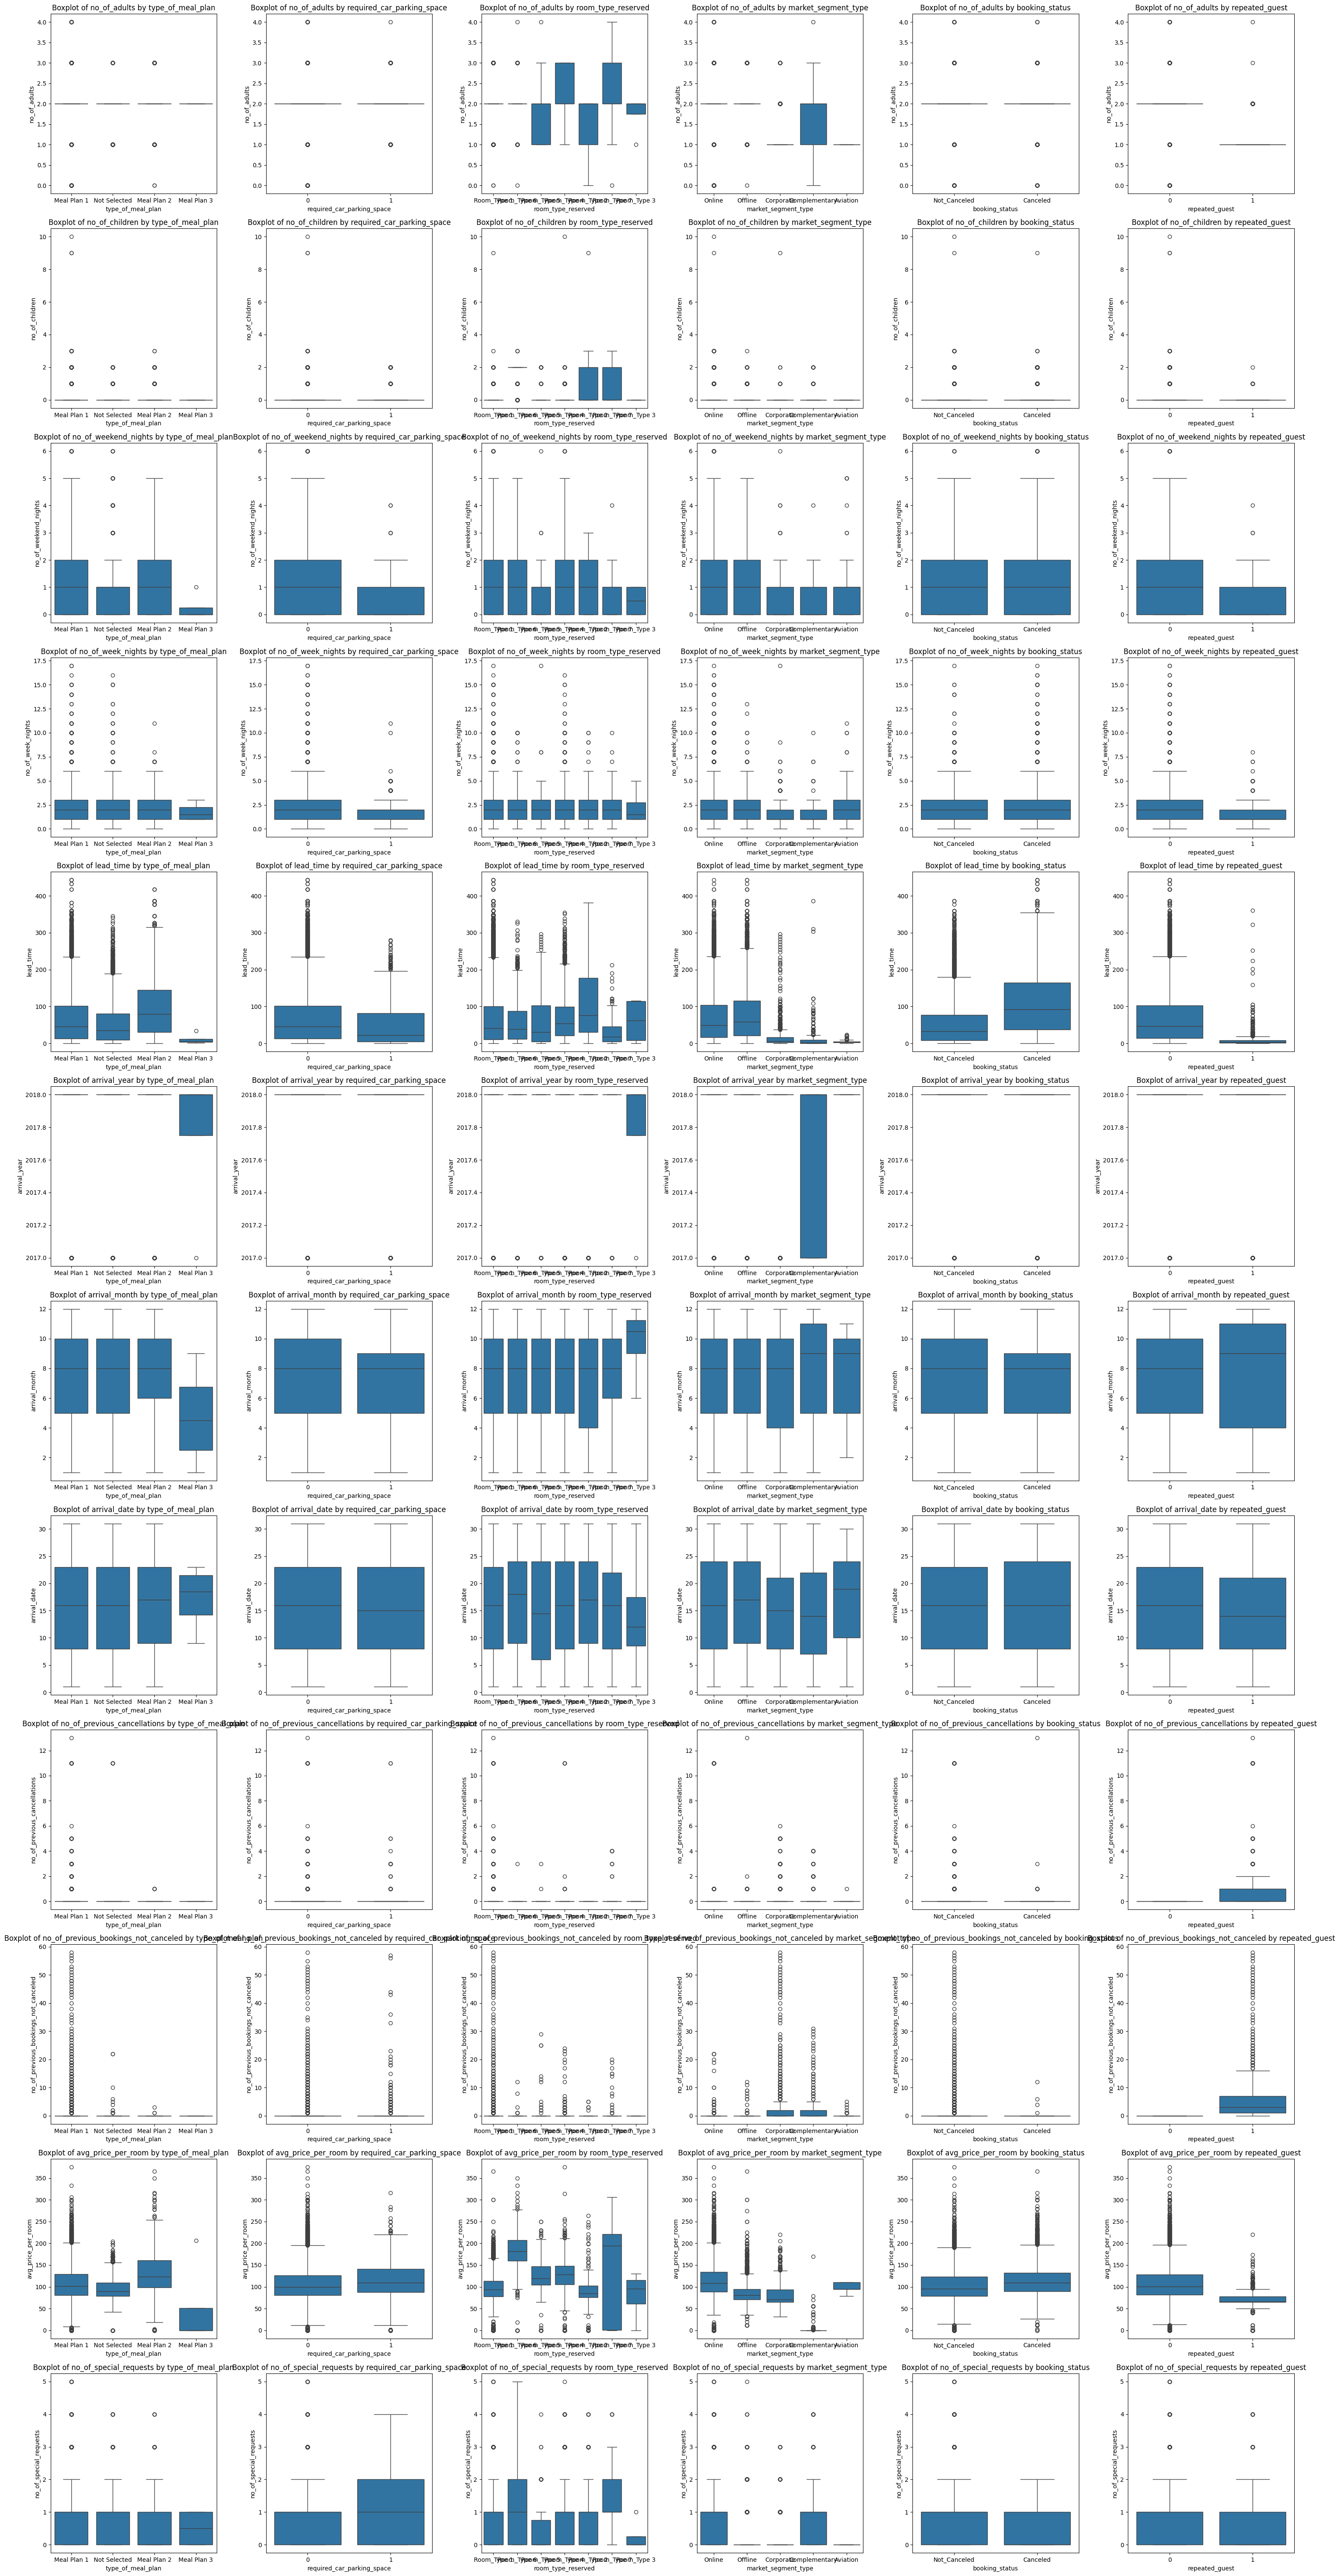

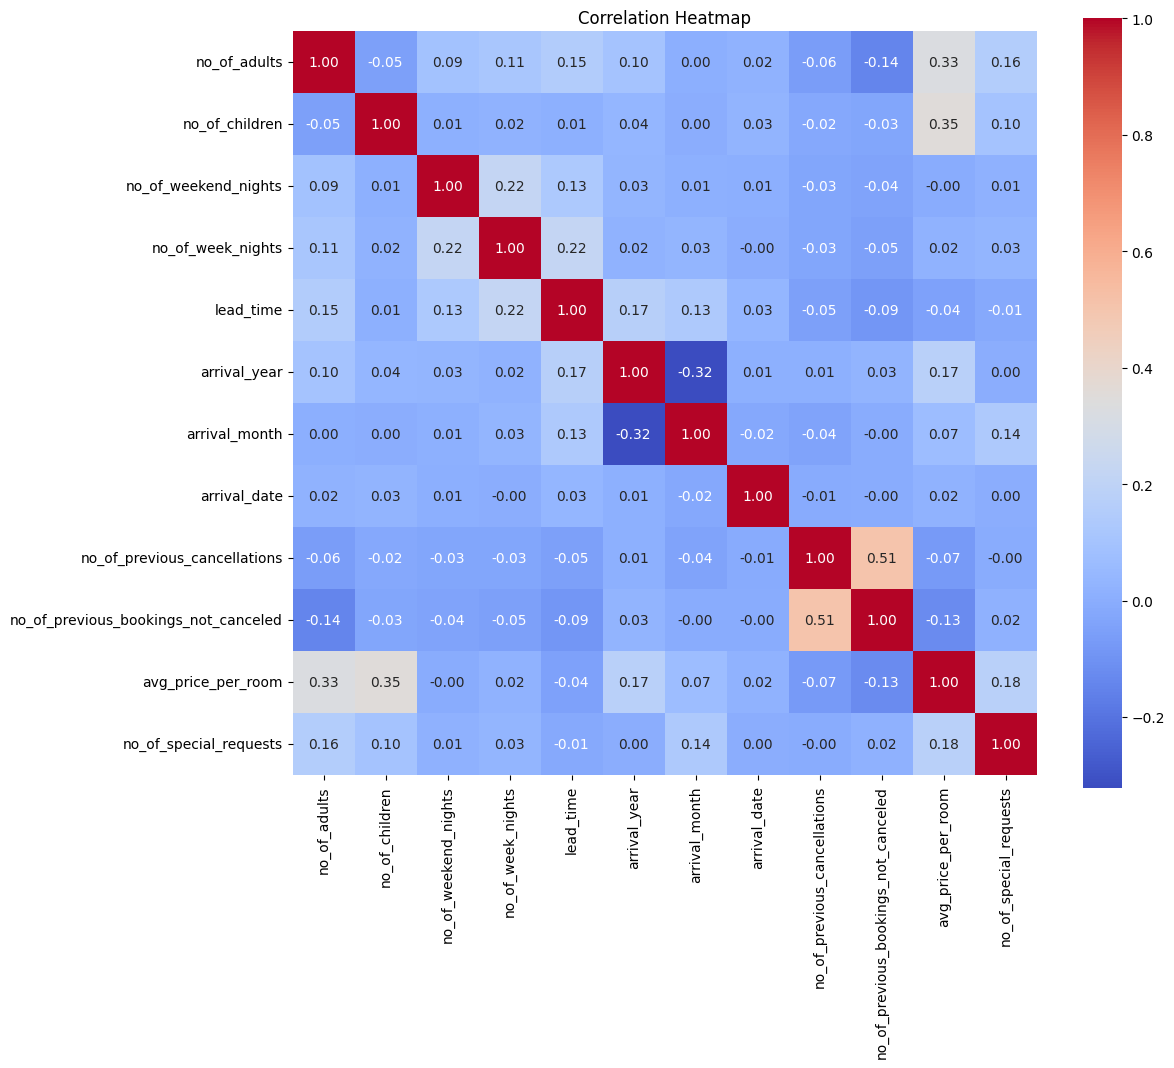

In [33]:
#BIvariate Analysis

def plot_bivariate(df, num_features, cat_features):
    fig, axes = plt.subplots(len(num_features), len(cat_features), figsize=(5*len(cat_features), 5*len(num_features)))
    for i, num_feature in enumerate(num_features):
        for j, cat_feature in enumerate(cat_features):
            sns.boxplot(x=df[cat_feature], y=df[num_feature], ax=axes[i][j])
            axes[i][j].set_title(f'Boxplot of {num_feature} by {cat_feature}')
            axes[i][j].set_xlabel(cat_feature)
            axes[i][j].set_ylabel(num_feature)
    plt.tight_layout()
    plt.show()  

plot_bivariate(data, num_cols, cat_cols)

#MULTIVARIATE ANALYSIS
def plot_correlation_heatmap(df, num_features):
    plt.figure(figsize=(12,10))
    corr = df[num_features].corr()
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
    plt.title('Correlation Heatmap')
    plt.show()
plot_correlation_heatmap(data, num_cols)



In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  object 
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  object 
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

In [37]:
###label encoding the categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
mapping = {}
for col in cat_cols:
    df[col] = le.fit_transform(df[col])
    mapping[col] = dict(zip(le.classes_, le.transform(le.classes_)))
    
    

In [39]:
mapping

{'type_of_meal_plan': {0: 0, 1: 1, 2: 2, 3: 3},
 'required_car_parking_space': {0: 0, 1: 1},
 'room_type_reserved': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6},
 'market_segment_type': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4},
 'booking_status': {0: 0, 1: 1},
 'repeated_guest': {0: 0, 1: 1}}

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  int64  
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  int64  
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

In [41]:
##multicollinearity check



In [43]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/10.0 MB ? eta -:--:--Requirement already satisfied: pytz>=2020.1 in /Users/tejeshboppana/HotelReservationPredction/venv/lib/python3.12/site-packages (from pandas!=2.1.0,>=1.4->statsmodels) (2025.2)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 35.7 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 35.7 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(df[num_cols])

vif_data = pd.DataFrame()   

vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                     for i in range(X.shape[1])]
vif_data
vif_data = vif_data[vif_data['feature'] != 'const']
vif_data
##no multicollinearity detected as all VIF values are below 5


,feature,VIF
1,no_of_adults,1.248721
2,no_of_children,1.199667
3,no_of_weekend_nights,1.065635
4,no_of_week_nights,1.104481
5,lead_time,1.194027
6,arrival_year,1.252010
7,arrival_month,1.222437
8,arrival_date,1.003156
9,no_of_previous_cancellations,1.353429
10,no_of_previous_bookings_not_canceled,1.396136


Text(0.5, 1.0, 'Correlation Heatmap')

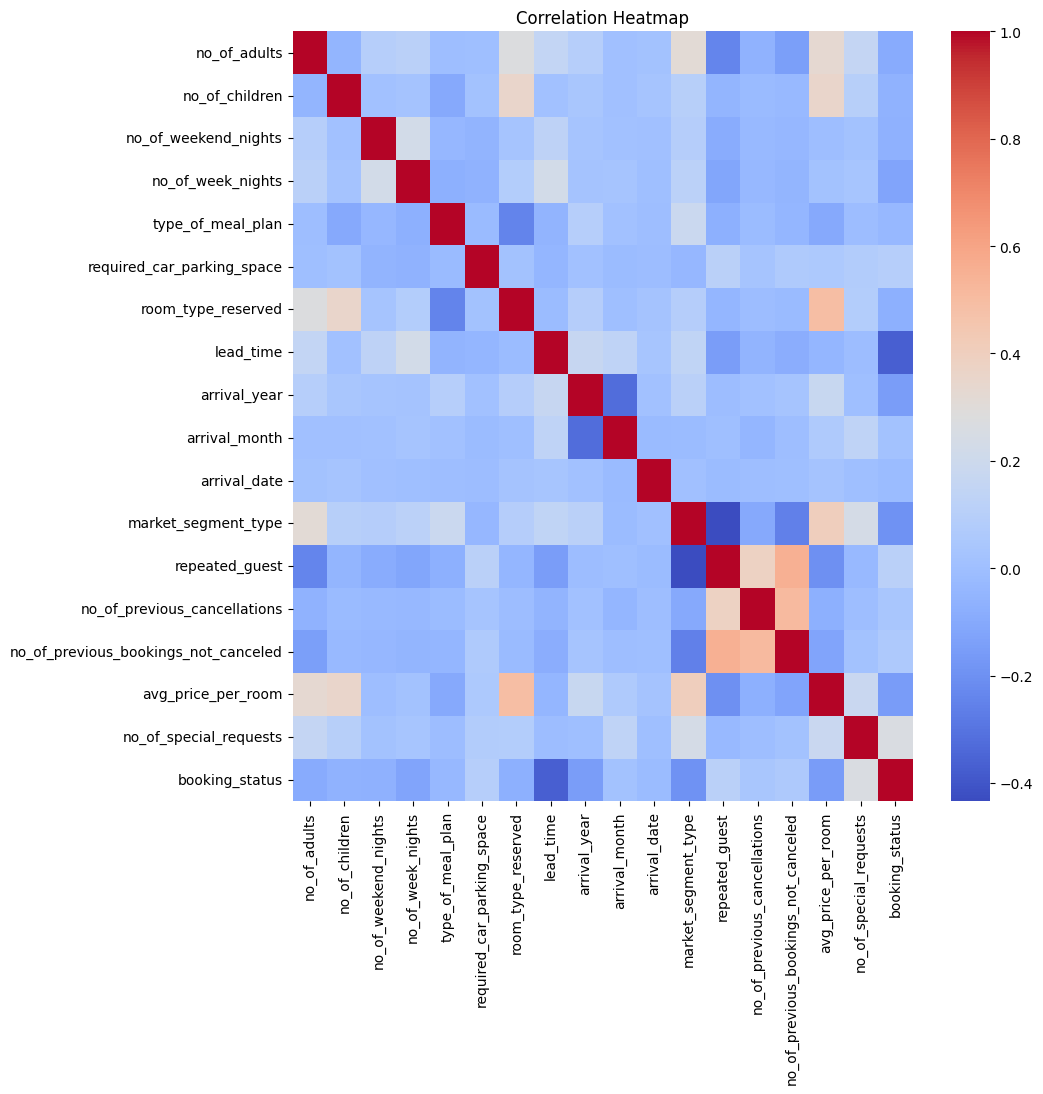

In [45]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')

In [46]:
Skewness = df.skew()
Skewness
Skewness = Skewness[abs(Skewness) > 0.5]
Skewness

no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            22.001489
no_of_previous_bookings_not_canceled    16.735934
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

In [62]:
for col in Skewness.index:
    if Skewness[col] > 5:
        df[col] = np.log1p(df[col])
    elif Skewness[col] < -5:
        df[col] = np.expm1(df[col])

In [49]:
# Handling Imbalanced Data 

X = df.drop('booking_status', axis=1)
Y = df['booking_status']


In [50]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [52]:
Y.value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [53]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X, Y)     

In [ ]:
pd.Series(Y_resampled).value_counts() 

booking_status
1    15231
0    15231
Name: count, dtype: int64

In [55]:
df.shape

(21359, 18)

In [56]:
balnced_data = pd.concat([pd.DataFrame(X_resampled), pd.Series(Y_resampled, name='booking_status')], axis=1)
balnced_data.shape

(30462, 18)

In [57]:
balnced_data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0.0,0.0,0.0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0.0,0.0,0.0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0.0,0.0,0.0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0.0,0.0,0.0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0.0,0.0,0.0,130.00,0,0


In [58]:
df = balnced_data.copy()

In [59]:
df.shape

(30462, 18)

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
X = df.drop(columns=['booking_status'])
y = df['booking_status']

In [65]:
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [66]:
Feature_importances = model.feature_importances_

In [67]:
Feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': Feature_importances})
Feature_importances_df = Feature_importances_df.sort_values(by='Importance', ascending=False)   

In [69]:
Feature_importances_df

,Feature,Importance
7,lead_time,0.261140
16,no_of_special_requests,0.183490
15,avg_price_per_room,0.148713
9,arrival_month,0.086560
10,arrival_date,0.084416
11,market_segment_type,0.058476
3,no_of_week_nights,0.044465
2,no_of_weekend_nights,0.030436
4,type_of_meal_plan,0.020160
6,room_type_reserved,0.019279


In [71]:
top_features_df = Feature_importances_df.sort_values(by='Importance', ascending=False).head(10)

In [73]:
top_10_features = top_features_df['Feature'].head(10).values

top_10_df = df[top_10_features.tolist() + ['booking_status']]

In [74]:
top_10_df.head()

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved,booking_status
0,26,0,161.00,10,17,4,1,2,0,0,1
1,98,2,121.50,7,16,4,1,1,0,0,1
2,433,0,70.00,9,8,3,3,0,0,0,0
3,195,0,72.25,8,8,3,5,2,0,0,1
4,188,0,130.00,6,15,3,2,0,0,0,0


In [75]:
df = top_10_df.copy()

In [76]:
!pip install xgboost lightgbm catboost

3555.20s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


  Using cached xgboost-3.1.2-py3-none-macosx_12_0_arm64.whl.metadata (2.1 kB)
  Using cached lightgbm-4.6.0-py3-none-macosx_12_0_arm64.whl.metadata (17 kB)
  Using cached lightgbm-4.6.0-py3-none-macosx_12_0_arm64.whl.metadata (17 kB)
  Using cached catboost-1.2.8-cp312-cp312-macosx_11_0_universal2.whl.metadata (1.4 kB)
  Using cached catboost-1.2.8-cp312-cp312-macosx_11_0_universal2.whl.metadata (1.4 kB)
  Using cached graphviz-0.21-py3-none-any.whl.metadata (12 kB)
  Using cached graphviz-0.21-py3-none-any.whl.metadata (12 kB)
  Using cached plotly-6.5.0-py3-none-any.whl.metadata (8.5 kB)
  Using cached plotly-6.5.0-py3-none-any.whl.metadata (8.5 kB)
  Using cached narwhals-2.14.0-py3-none-any.whl.metadata (13 kB)
Using cached xgboost-3.1.2-py3-none-macosx_12_0_arm64.whl (2.2 MB)
Using cached lightgbm-4.6.0-py3-none-macosx_12_0_arm64.whl (1.6 MB)
Using cached catboost-1.2.8-cp312-cp312-macosx_11_0_universal2.whl (27.8 MB)
  Using cached narwhals-2.14.0-py3-none-any.whl.metadata (13 kB

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier  
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report 


In [78]:
X = df.drop('booking_status', axis=1)
y = df['booking_status']


In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [80]:
classifiers = { 

                'RandomForestClassifier': RandomForestClassifier(random_state=42),
                'GradientBoostingClassifier': GradientBoostingClassifier(random_state=42),
                'AdaBoostClassifier': AdaBoostClassifier(random_state=42),
                'XGBClassifier': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
                'LogisticRegression': LogisticRegression(random_state=42),
                'SVC': SVC(random_state=42, probability=True),      
                'KNeighborsClassifier'  : KNeighborsClassifier(),
                'LGBMClassifier': LGBMClassifier(random_state=42),
                'XGBoostClassifier': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
             }  

In [81]:
metrics = {
    "model": [],
    "accuracy": [],
    "precision": [],
    "recall": [],
    "f1_score": []
}

In [83]:
for model_name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    metrics["model"].append(model_name)
    metrics["accuracy"].append(accuracy)
    metrics["precision"].append(precision)
    metrics["recall"].append(recall)
    metrics["f1_score"].append(f1)
    
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("-" * 30)

Model: RandomForestClassifier
Accuracy: 0.8876
Precision: 0.8869
Recall: 0.8884
F1 Score: 0.8876
------------------------------
Model: GradientBoostingClassifier
Accuracy: 0.8287
Precision: 0.8138
Recall: 0.8523
F1 Score: 0.8326
------------------------------
Model: GradientBoostingClassifier
Accuracy: 0.8287
Precision: 0.8138
Recall: 0.8523
F1 Score: 0.8326
------------------------------
Model: AdaBoostClassifier
Accuracy: 0.7970
Precision: 0.8181
Recall: 0.7636
F1 Score: 0.7899
------------------------------
Model: AdaBoostClassifier
Accuracy: 0.7970
Precision: 0.8181
Recall: 0.7636
F1 Score: 0.7899
------------------------------
Model: XGBClassifier
Accuracy: 0.8687
Precision: 0.8656
Recall: 0.8729
F1 Score: 0.8692
------------------------------
Model: LogisticRegression
Accuracy: 0.7712
Precision: 0.7950
Recall: 0.7308
F1 Score: 0.7615
------------------------------
Model: XGBClassifier
Accuracy: 0.8687
Precision: 0.8656
Recall: 0.8729
F1 Score: 0.8692
-----------------------------

In [85]:
metrics_df = pd.DataFrame(metrics)
metrics_df

,model,accuracy,precision,recall,f1_score
0,RandomForestClassifier,0.887576,0.886922,0.888378,0.887650
1,GradientBoostingClassifier,0.828656,0.813793,0.852265,0.832585
2,AdaBoostClassifier,0.796980,0.818150,0.763624,0.789947
3,XGBClassifier,0.868702,0.865560,0.872948,0.869238
4,LogisticRegression,0.771213,0.795000,0.730794,0.761546
5,SVC,0.723946,0.731500,0.707485,0.719292
6,KNeighborsClassifier,0.781717,0.848780,0.685489,0.758445
7,LGBMClassifier,0.860003,0.846008,0.880171,0.862751
8,XGBoostClassifier,0.868702,0.865560,0.872948,0.869238


In [87]:
### Train our mdoel

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


In [88]:
X = df.drop('booking_status', axis=1)
y = df['booking_status']


In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [90]:
rf = RandomForestClassifier(random_state=42)

In [91]:
params_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(5, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False]
}

In [94]:
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=params_dist,
    n_iter=5,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1,
    scoring='accuracy'
)

In [95]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


python(18969) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18970) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18971) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18972) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18970) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18971) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18972) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18973) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18973) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18974) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18974) Malloc

[CV] END bootstrap=True, max_depth=33, min_samples_leaf=15, min_samples_split=12, n_estimators=121; total time=   1.8s
[CV] END bootstrap=True, max_depth=33, min_samples_leaf=15, min_samples_split=12, n_estimators=121; total time=   1.9s
[CV] END bootstrap=True, max_depth=33, min_samples_leaf=15, min_samples_split=12, n_estimators=121; total time=   1.8s
[CV] END bootstrap=True, max_depth=33, min_samples_leaf=15, min_samples_split=12, n_estimators=121; total time=   1.9s
[CV] END bootstrap=True, max_depth=33, min_samples_leaf=15, min_samples_split=12, n_estimators=121; total time=   2.0s
[CV] END bootstrap=True, max_depth=25, min_samples_leaf=7, min_samples_split=12, n_estimators=252; total time=   4.6s
[CV] END bootstrap=True, max_depth=25, min_samples_leaf=7, min_samples_split=12, n_estimators=252; total time=   4.6s
[CV] END bootstrap=True, max_depth=25, min_samples_leaf=7, min_samples_split=12, n_estimators=252; total time=   4.6s
[CV] END bootstrap=True, max_depth=25, min_samples_

,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestC...ndom_state=42)
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'bootstrap': [True, False], 'max_depth': <scipy.stats....t 0x17d95e570>, 'min_samples_leaf': <scipy.stats....t 0x17ddf7530>, 'min_samples_split': <scipy.stats....t 0x17e556930>, ...}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",5
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the vario

In [96]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 25,
 'min_samples_leaf': 1,
 'min_samples_split': 13,
 'n_estimators': 107}

In [97]:
best_rf_model = random_search.best_estimator_

In [98]:
y_pred = best_rf_model.predict(X_test)

In [99]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [100]:
accuracy

0.8801903824060398

In [101]:
precision

0.8735483870967742

In [102]:
recall

0.8890347997373604

In [103]:
import joblib

In [105]:
import os
os.makedirs('/Users/tejeshboppana/HotelReservationPredction/artifacts/model', exist_ok=True)
joblib.dump(best_rf_model, '/Users/tejeshboppana/HotelReservationPredction/artifacts/model/best_random_forest_model.pkl')

['/Users/tejeshboppana/HotelReservationPredction/artifacts/model/best_random_forest_model.pkl']

In [106]:
loaded_model = joblib.load("/Users/tejeshboppana/HotelReservationPredction/artifacts/model/best_random_forest_model.pkl")

In [107]:
X_train[0:1]

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved
5872,19,1,148.0,12,30,4,2,0,0,3


In [108]:
new_data = np.array([190,1, 93.5 ,  9, 8 , 4, 5, 2, 0 ,0])

In [109]:
predictions = loaded_model.predict(new_data.reshape(1,-1))

In [110]:
predictions

array([1])